# Task 4: Restaurant Chains Analysis

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Loading the dataset
df = pd.read_csv('G:\DataAnalysis\Dataset .csv')

In [42]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [35]:
df_clean=df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

# Restaurant Chains 
1. Identify if there are any restaurant chains present in the dataset.
2. Analyze the ratings and popularity of different restaurant chains.

In [27]:
# To identify restaurant chains
chain_counts = df['Restaurant Name'].value_counts()
rest_chains = chain_counts[chain_counts > 1].index

In [28]:
# To filter dataset for restaurant chains with multiple occurrences.
df_chains = df[df['Restaurant Name'].isin(rest_chains)]

In [37]:
# To analyze average rating and total votes
analysis_of_chain = df_chains.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Branch Count'}).sort_values(by='Votes', ascending=False)

In [30]:
# Display the results: 
print("Top 10 Restaurant Chains by Popularity:\n")
print(analysis_of_chain.head(10))

Top 10 Restaurant Chains by Popularity:

                           Aggregate rating  Votes  Branch Count
Restaurant Name                                                 
Barbeque Nation                    4.353846  28142            26
AB's - Absolute Barbecues          4.825000  13400             4
Big Chill                          4.475000  10853             4
Farzi Cafe                         4.366667  10098             6
Truffles                           3.950000   9682             2
Chili's                            4.580000   8156             5
Joey's Pizza                       4.250000   7807             2
Big Yellow Door                    4.266667   7511             3
Saravana Bhavan                    4.133333   7238             3
Starbucks                          3.805556   7139            18


In [44]:
# For more understanding 
top_chains = chain_analysis.head(10).reset_index()

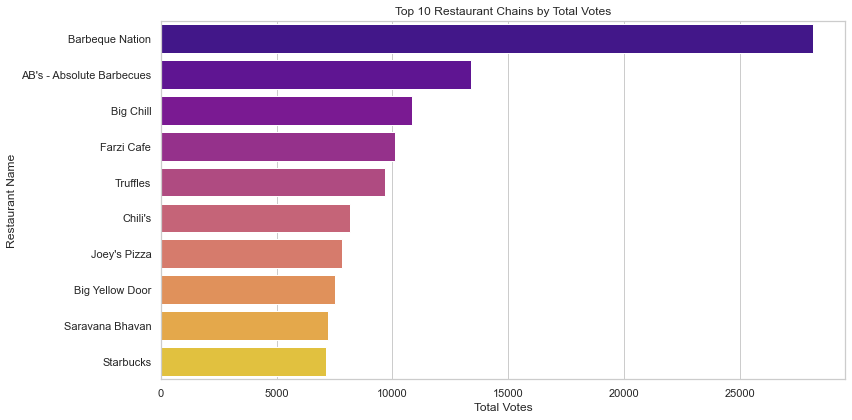

In [45]:
#  Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_chains, x='Votes', y='Restaurant Name', palette='plasma')
plt.title('Top 10 Restaurant Chains by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()